In [1]:
# Import libraries 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Load the dataset

df = pd.read_csv('Churn_Modelling.csv')

df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1183,1184,15600992,Madukaego,652,France,Male,36,1,0.00,2,1,1,151314.98,0
9043,9044,15801920,Christian,727,Germany,Male,39,5,80615.46,2,0,0,180962.32,0
4109,4110,15807768,Cohn,702,Germany,Male,28,1,103033.83,1,1,1,40321.87,0
8363,8364,15677336,Aitken,557,Germany,Male,57,1,120043.13,1,1,0,132370.75,1
1130,1131,15628205,Greco,571,Germany,Female,34,1,101736.66,1,0,1,195651.66,0


In [3]:
churn_counts = df['Exited'].value_counts()
print("Number of Non churners:", churn_counts[0])
print("Number of Churners:", churn_counts[1])


Number of Non churners: 7963
Number of Churners: 2037


# Dropping columns that doesn't contribute meaningfully to the prediction. 

In [4]:
# data cleaning 

df = df.drop(labels=['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [5]:
df.corr(numeric_only = True)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [6]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Looking into numerical features for skewness and kurtosis. 

In [7]:
# skewness and kurtosis 

df[['Age','EstimatedSalary','Balance','CreditScore']].agg(['skew','kurtosis']).transpose()

,skew,kurtosis
Age,1.011320,1.395347
EstimatedSalary,0.002085,-1.181518
Balance,-0.141109,-1.489412
CreditScore,-0.071607,-0.425726


- For 'Age', the positive skew indicates a right-skewed distribution. So, will handle this. 

<Axes: xlabel='Age', ylabel='Count'>

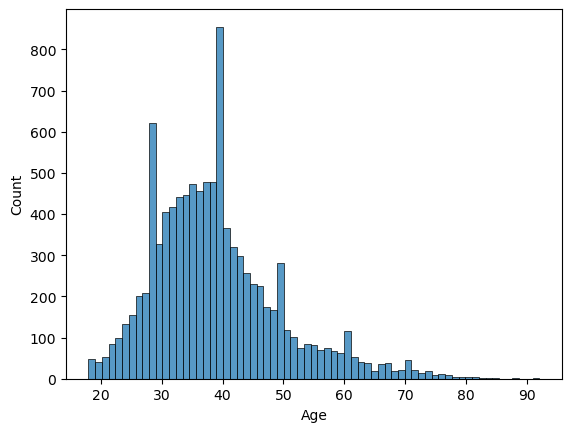

In [8]:
sns.histplot(df['Age'])


In [9]:
# Using log transformation 

df1 = df.copy()

In [10]:
# Log transformation on the 'Age' attribute
df1['Age_log'] = np.log(df1['Age'])

# Displaying the transformed data
print(df1[['Age', 'Age_log']])

      Age   Age_log
0      42  3.737670
1      41  3.713572
2      42  3.737670
3      39  3.663562
4      43  3.761200
...   ...       ...
9995   39  3.663562
9996   35  3.555348
9997   36  3.583519
9998   42  3.737670
9999   28  3.332205

[10000 rows x 2 columns]


<Axes: xlabel='Age_log', ylabel='Count'>

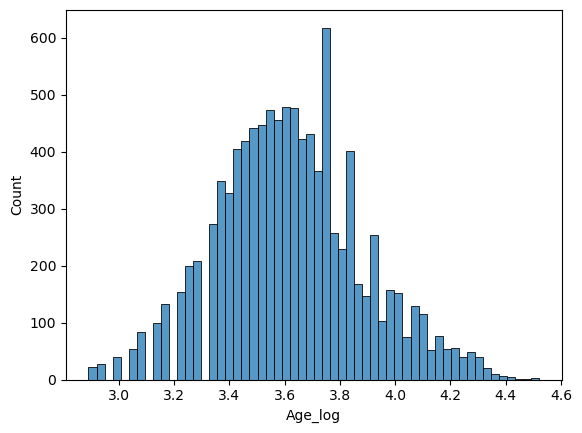

In [11]:
sns.histplot(df1['Age_log'])


In [12]:
df1.sample(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_log
9137,535,France,Female,38,0,135919.33,1,1,0,80425.65,0,3.637586
8455,609,France,Female,53,6,0.00,2,1,1,124218.27,0,3.970292
3182,669,France,Female,43,1,160474.59,1,1,1,95963.14,0,3.761200
4526,798,France,Male,34,9,154495.79,1,1,0,191395.88,0,3.526361
682,651,Germany,Female,41,4,133432.59,1,0,1,151303.48,0,3.713572


In [13]:


df2 = df.copy()

In [14]:
# handle outliers using the Interquartile Range (IQR) method

# Calculate the IQR (Interquartile Range)
Q1 = df2['Age'].quantile(0.25)
Q3 = df2['Age'].quantile(0.75)
IQR = Q3 - Q1

# Determine the boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out the outliers
outliers = df2[(df2['Age'] < lower_bound) | (df2['Age'] > upper_bound)]
cleaned_data = df2[~((df2['Age'] < lower_bound) | (df2['Age'] > upper_bound))]

# Show the outliers and the cleaned data after outlier removal
print("Outliers:")
print(outliers)
print("\nCleaned Data:")
print(cleaned_data)


Outliers:
      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
58            511     Spain  Female   66       4       0.00              1   
85            652     Spain  Female   75      10       0.00              2   
104           670     Spain  Female   65       1       0.00              1   
158           646    France  Female   73       6   97259.25              1   
181           510    France    Male   65       2       0.00              2   
...           ...       ...     ...  ...     ...        ...            ...   
9753          656   Germany    Male   68       7  153545.11              1   
9765          445    France    Male   64       2  136770.67              1   
9832          595   Germany  Female   64       2  105736.32              1   
9894          521    France  Female   77       6       0.00              2   
9936          609    France    Male   77       1       0.00              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exi

In [15]:
cleaned_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


<Axes: xlabel='Age', ylabel='Count'>

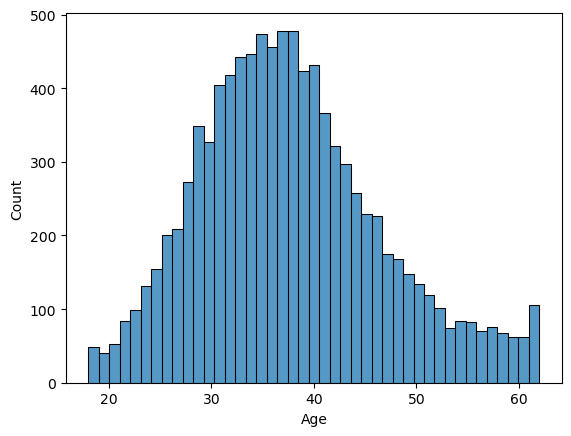

In [16]:
sns.histplot(cleaned_data['Age'])


In [17]:
# Z- scores 

df3 = df.copy()

In [18]:
z_scores = (df3['Age'] - df3['Age'].mean()) / df3['Age'].std()
threshold = 3
outlier_mask = np.abs(z_scores) > threshold
outlier_mask

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: Age, Length: 10000, dtype: bool

In [19]:
df3 = df3[~outlier_mask]


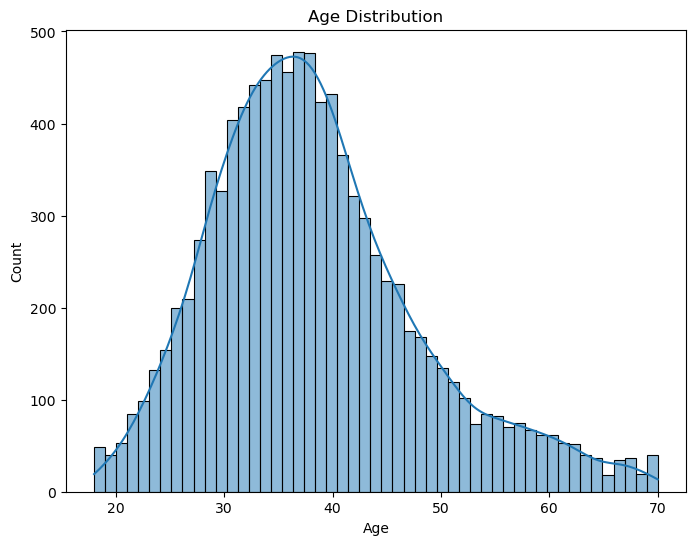

In [20]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df3, x='Age', kde=True)
plt.title('Age Distribution')
plt.show()

In [21]:
# Using log transformation 

df1[['Age','Age_log','EstimatedSalary','Balance','CreditScore']].agg(['skew','kurtosis']).transpose()

,skew,kurtosis
Age,1.011320,1.395347
Age_log,0.182020,0.152794
EstimatedSalary,0.002085,-1.181518
Balance,-0.141109,-1.489412
CreditScore,-0.071607,-0.425726


In [22]:
# Z- scores 

df3[['Age','EstimatedSalary','Balance','CreditScore']].agg(['skew','kurtosis']).transpose()

,skew,kurtosis
Age,0.738466,0.499480
EstimatedSalary,0.000724,-1.180758
Balance,-0.143785,-1.487291
CreditScore,-0.070813,-0.428894


In [23]:
# IQR (Interquartile Range)

cleaned_data[['Age','EstimatedSalary','Balance','CreditScore']].agg(['skew','kurtosis']).transpose()

,skew,kurtosis
Age,0.490409,-0.003041
EstimatedSalary,-0.001975,-1.181226
Balance,-0.142040,-1.486478
CreditScore,-0.072269,-0.425260


In [24]:
# Original dataframe

df[['Age','EstimatedSalary','Balance','CreditScore']].agg(['skew','kurtosis']).transpose()

,skew,kurtosis
Age,1.011320,1.395347
EstimatedSalary,0.002085,-1.181518
Balance,-0.141109,-1.489412
CreditScore,-0.071607,-0.425726


# Comparing all of them, using log transformation gives the best curve. 

- But a new column is added, what should i do? 


# Dealing with catagorical fetures - One-Hot-Encoding

In [32]:
df_new = df.copy()

In [34]:
df_new = pd.get_dummies(df_new, dtype = int)
df_new

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [35]:
# Log transformation on the 'Age' attribute
df_new['Age_log'] = np.log(df_new['Age'])

# Displaying the transformed data
print(df_new[['Age', 'Age_log']])

      Age   Age_log
0      42  3.737670
1      41  3.713572
2      42  3.737670
3      39  3.663562
4      43  3.761200
...   ...       ...
9995   39  3.663562
9996   35  3.555348
9997   36  3.583519
9998   42  3.737670
9999   28  3.332205

[10000 rows x 2 columns]


In [36]:
df_new[['Age','Age_log','EstimatedSalary','Balance','CreditScore']].agg(['skew','kurtosis']).transpose()

,skew,kurtosis
Age,1.011320,1.395347
Age_log,0.182020,0.152794
EstimatedSalary,0.002085,-1.181518
Balance,-0.141109,-1.489412
CreditScore,-0.071607,-0.425726


In [37]:
df_new

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Age_log
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0,3.737670
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0,3.713572
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0,3.737670
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0,3.663562
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0,3.761200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1,3.663562
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1,3.555348
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0,3.583519
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1,3.737670
